# Here, we are coding our first artificial neuron.

## Theory:

We will use a linear model. First, we initialize the parameters **W** and **b** of our model.

Then, we define an iterative algorithm that loops through the following steps:

1. **Model Function**  
   This function represents our artificial neuron's behavior. It includes the linear transformation and an activation function. Here, we use the **sigmoid activation function** to introduce non-linearity.

2. **Cost Function**  
   This function evaluates the performance of our model by comparing its output to the ground truth labels **y**. We use the **log loss** (logarithmic loss) function to measure this difference.

3. **Gradients Function**  
   This function computes the gradients of the cost with respect to the model's parameters. These gradients indicate how each parameter influences the model's error. The objective is to use this information to move the parameters in the direction that reduces the cost.

4. **Update Function**  
   This function slightly adjusts the model parameters using the previously computed gradients. The goal is to iteratively approach the optimal parameter set that minimizes the cost function.


> This is the **generic architecture** for training a neural network.  
> All neural networks in the world follow this same kind of procedure.

In [750]:
#%pip install numpy matplotlib scikit-learn
# Import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

C'est partie pour le code.

nous allons generer un dataset de 100 points. chaque point est decrit par ses coordonnes (x1, x2), et une classe lui ait attribué. Voyez pour l'instant la notion de classe comme une verite terrain.

X represente les donnes d'entrees (toutes les donnees x = (x1, x2))
y represente les donnees de reference = la verite terrain

chaque donnee x possede sa classe y.

X shape: (100, 2)
y shape: (100, 1)


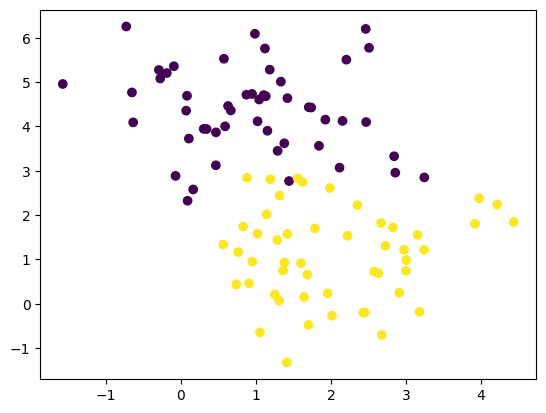

In [751]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

# Create a scatter plot of the data
print('X shape:', X.shape)
print('y shape:', y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.show()

maintenant, on va creer la fonction initilaisation pour initialiser proprement les parantres W et b de notre models lineaire. en effet la variable d'entree x peut avoir plusieurs dimensions : x = (x1, x2, ..., xn). Il faut donc que le paraetres W s'adapte a la taille du vecteur x pour influer sur chacunes des composantes/ des dimensions de ce vecteur.

Ici, X est de dimensionion 2 car on peut representer les donnees d'entree sur 2 axes : X = (x1, x2)

In [752]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return W, b

W, b = initialisation(X)
print(W.shape)
print(b.shape)
print(W, b)

(2, 1)
(1,)
[[ 0.2119516 ]
 [-0.19070384]] [0.23028121]


On voit que W est bien un vecteur a 2 colonnes, et b un nombre reel.

Maintenant on va coder le modele de notre neurone. on repondre a la question : comment le neurone traduit les informations qu'il recoit ?

On choisit un modele lineaire. Le neurone traite lineairement la donnee qu'il recoit. Pour introduire de l'intelligence, on choisit une fonction d'activation du neurone non lineaire. Le neurone decide alors de s'activer ou non selon ce principe.

In [753]:
def model(X, W, b):
    Z = np.dot(X, W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

A = model(X, W, b)
print(A.shape)

(100, 1)


On a un vecteur a une colonne, 100 lignes. on a 100 activations car 100 donnees d'entree.

definissons maintenant la fonction cout : Log-Loss

In [754]:
def log_loss(A, y):
    m = len(y)
    loss = -1/m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    return loss

loss = log_loss(A, y)
print(loss)


0.5131763380404153


On obtient bien un reel qui represente l'erreur entre le modele et la realite.

maintenant occupons nous des gradients : une directtion infinitesimal vers ou aller pour minimiser la fonction cout.

In [755]:
def gradients(A, X, y):
    m = len(y)
    dZ = A - y
    dW = 1/m * np.dot(X.T, dZ)
    db = 1/m * np.sum(dZ)
    return dW, db

dW, db = gradients(A, X, y)
print(dW, db)

[[-0.15316668]
 [ 0.61743835]] 0.006842075618281678


Maintenant qu'on a la direction ou aller, on met a jour de cette quentitte infinitesimal des parametres du models pour se rapprocher peu a peu du meilleur set de parametres (qui minismera la fonction cout).

In [756]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return W, b

W, b = update(dW, db, W, b, learning_rate=0.1)
print(W, b)

[[ 0.22726827]
 [-0.25244767]] [0.229597]


On voit bien ici que les parametres (W, b) on ete mis a jour d'une petite quantite

Maintenant on rassemble toutes ces fonctions sur une meme architecture.

C'est la qu'on voit l'apprentissage : on donne en parametres d'entree simplement les donners X et y, rien de plus.

In [757]:
def artificial_neuron(X, y, learning_rate=0.1, num_iter=100):
    # initializer parameters
    W, b = initialisation(X)

    # error visualization : plotting the loss at each iteration
    loss = []

    for i in range(num_iter):
        A = model(X, W, b)
        loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    plt.plot(loss)
    plt.show

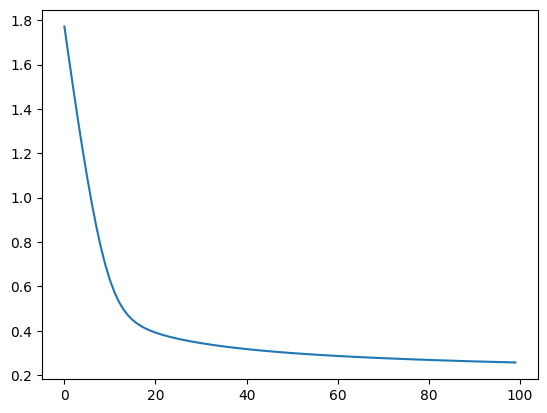

In [758]:
artificial_neuron(X, y)

On voit l'evolution des erreurs effectuer par le modele en fonction des iterations : c'est la courbe d'apprentissage

Nous avons maintenant un modele de neurone artificiels : on peut s'en servir pour faire des predictions

Mais en fait, tout est deja la pour faire le prediction.

Mais pour faire de la prediction il faut deja entrainer notre neurone artificiel. et oui, sinon comment avoir un critere de confiance quant a la plausibilite de la prediction ?

On va donc entrainer notre modele sur les donnees qu'on a deja. On va considerer la situation suivante : On a mesurer la largeur/longueur de feuilles pour differentes plantes, on a placer ces donnes sur un graphe avec deux axes : largeur/longueur. Disons qu'on a alors mesurer les feuilles de 100 differentes plantes. Ce sont nos donnees X. Pour chaque plante, on savait si celle ci etait toxique ou non. Cette information est representee par la donnee y de notre modele.

On va entrainer notre modele en regardant pour chaque plante ce qu'il aurait predit (plante toxique ou non ?) et on va comparer avec la verite (la plante etait elle vraiment toxiaue ou non ?) et mesurer l'excactitude des resultats. Attention ici on ne parle pas de "l'erreur" du modele enoncee precedemment (qui participe a la precision de la prediction) mais bien de l'erreur finale : est ce que le modele a reussi a correctement predire la toxicite de la plante, et sur 100 plantes quel est son taux de fausse predicition ?

Pour faire ceci, il faut une fonction de prediction. Si la probabilite que la plante soit toxique est superieur a 50%, alors en renvoit True, sinon False. Pour voir a quel point le modele est juste, il nous faut une mesure d'exctactitude, ie sur toutes les predictions de chaque point, quel est le pourcentage ou le neurone a bien predit la classe du point, et quand s'est il trompé.

Mais en a deja cette fonction de prediciton. Comment le neurone predit la sortie en fonction de l'entree ? Avec son modele lineaire Z et sa fonction d'activation A.

la sortie A est une probabilite. On a qu'a dire que si cette probabilite de sortie est superieur a 0.5, alors la plante a plus de chance d'etre toxique, donc on renvoie y = True. Sinon on renvoie False.

In [759]:
def predict(X, W, b):
    A = model(X, W, b)
    #print(A)
    return A >= 0.5

L'avantage c'est que pour chaque resultat (True ou False), on peut revenir a la probabilite qui a per;is de fsaire ce choix afin voir a auelle point on peur faire confiance a ce resulatat. En effet si la proba est proche de 0 ou 1, on peut avoir confiance en ce resultat, mais si la probabilite est proche de 0.5, on aura moins confiance en ce resultat, car celui ci a des chamces d'etre faux. Si c'est le cas le modele aura mal predit, ce resultat sera compte comme faux. l'accuracy du modele ne sera pas de 100%.

Justement pour mesurer cette accuracy, on a qu'a compter sur les 100 donnees combien de fausses predictions le modele a fait :

In [760]:
from sklearn.metrics import accuracy_score

Maintenant regardons quelles sont les predicition du neurone pour les 100 plantes.

In [761]:
def artificial_neuron(X, y, learning_rate=0.1, num_iter=100):
    # initializer parameters
    W, b = initialisation(X)

    # error visualization : plotting the loss at each iteration
    loss = []

    for i in range(num_iter):
        A = model(X, W, b)
        loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    # Loop finished, best set parameters (W, b)

    y_pred = predict(X, W, b)
    print('accuracy score :', accuracy_score(y, y_pred))

    plt.plot(loss)
    plt.show

    print("final set parameters :", W, b)
    return W, b

accuracy score : 0.93
final set parameters : [[ 0.78664738]
 [-1.30658672]] [2.03399173]


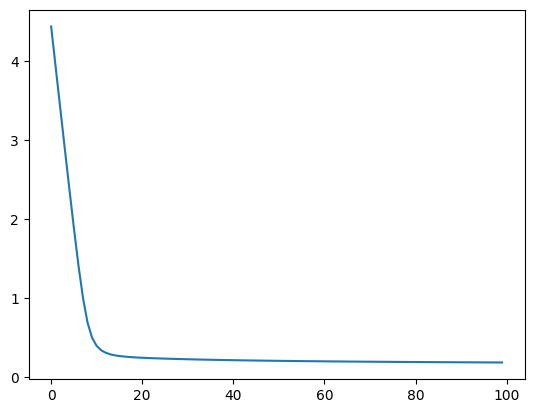

In [762]:
W, b = artificial_neuron(X, y)

Vous avez accuracy_score = 0.92, ou bien 0.86 par exemple.

Ca veut dire que dans 86% des cas, le neurone a reussi a predire la bonne classe, ie a predire si la plante, en fonction de la largeur/longeur de ses feuilles etait toxique (True) ou non (False).

Et vous avez les parametres finaux W et b, qui representent le set de parametres du neurones entraines apres 100 iterations, qui est ici le meilleur set de parametres car on voit que la courbe d'apprentissage (loss function) est minimum a la fin.

Maintenant on recolte une plante, et on mesure la largeur/longeur moyenne des feuilles. On la place en rouge dans le graphique.

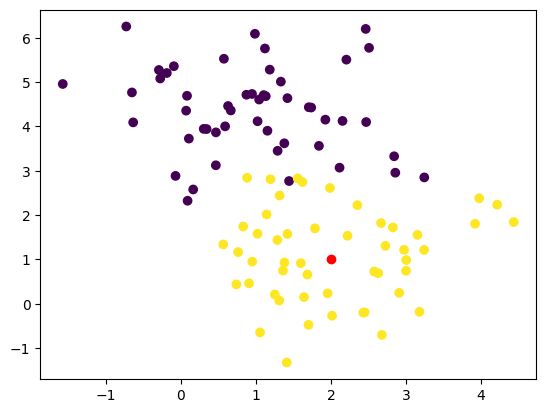

In [763]:
new_plant = np.array([2, 1])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.scatter(new_plant[0], new_plant[1], c='r')

plt.show()

In [764]:
def predict(X, W, b):
    A = model(X, W, b)
    print(A)
    return A >= 0.5

predict(new_plant, W, b)

[0.90893498]


array([ True])

Vous avez True car la probabilite de 0.88 > 0.5.

Selon la machine, cette plante est dans la classe jaune ie classe des plantes toxiques.

A quel point on peut croire ce resultat ? Le resultat est fiable a 88%.

Maintenant on comprend mieux comment le neurone classifie de nouvelles donnees.

On sent bien qu'il y a des points qui vont etre classe avec certitude (probabilite proche de 0 ou 1), et d'autre qui seront un peu entre les deux (probabilite proche de 0.5).

Si on represente tout les points qui se situe dans le graphique avec un probabilite de 0.5 pile, on se sait pas vraiment ou les classer. on appelle cette frontiere la frontiere de decision. Un mouvement infintesimal hors de cette frontiere, et le modele arrive a prendre une decison.

representons cette frontiere de decision sur le graphique.

En reprenant l'expression mathematique de la fonction a et z (voire notebook--> 00_theory-intro), dire que a = 0.5 revient simplement a dire que z = 0.

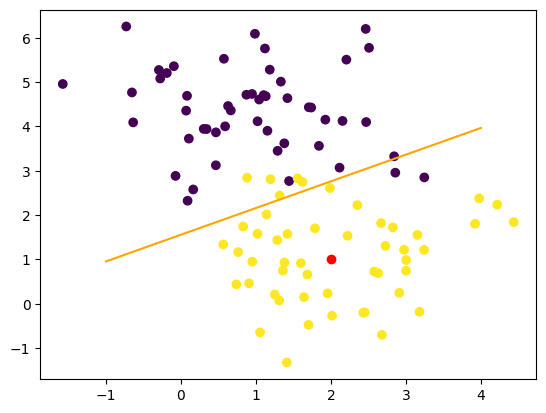

In [765]:
new_plant = np.array([2, 1])

x1 = np.linspace(-1, 4, 100)
x2 = (-W[0] * x1 - b) / W[1]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.plot(x1, x2, c='orange')
plt.show()

On voit plusieurs choses tres interessantes. Deja on voit ici le modele lineaire du neurone qui permet de prendre une decision entre les deux classes.

On voit aussi que le point rouge etait logique a classifier comme plante toxique car relativement loin de la frontiere de decision. meme plus on se rapproche de cette frontiere et plus les erreurs sont frequentes. c'est normal, le preidiction a un taux de confiance proche de 50%, donc il y a une chance sur deux que le modele se trompe aux alentours de cette frontiere.